In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

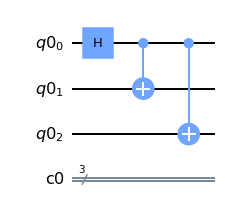

In [2]:
qc.h(q[0])
qc.cx(q[0], q[1])
qc.cx(q[0], q[2])
qc.draw('mpl')

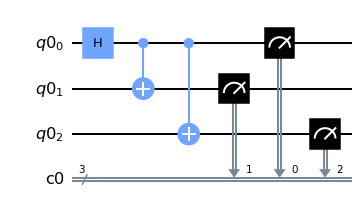

In [3]:
for i in range(3):
    qc.measure(q[i], c[i])
    
qc.draw('mpl')

In [4]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'111': 527, '000': 497}


/Users/tony.askar/.local/share/virtualenvs/quantum-computing-notes-7_ZZ-3Va/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/tony.askar/.local/share/virtualenvs/quantum-computing-notes-7_ZZ-3Va/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


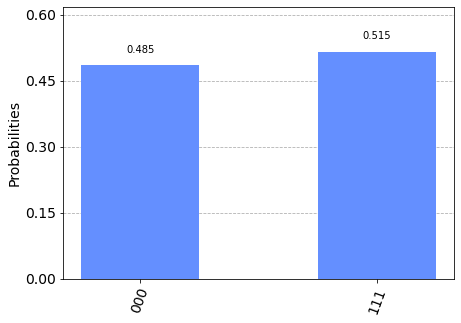

In [5]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [6]:
from qiskit import IBMQ
import os
from dotenv import load_dotenv
load_dotenv()
api_token = os.environ.get('ibm_api_token')  # set api_token in .env file (https://quantum-computing.ibm.com)
IBMQ.save_account(api_token)

configrc.store_credentials:WARNING:2022-07-15 21:39:19,550: Credentials already present. Set overwrite=True to overwrite.


In [7]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
provider = IBMQ.get_provider('ibm-q')

In [9]:
qcomp = provider.get_backend('ibmq_lima')  # Name of computer from (https://quantum-computing.ibm.com/services)

In [10]:
qc_compiled = transpile(qc, qcomp)

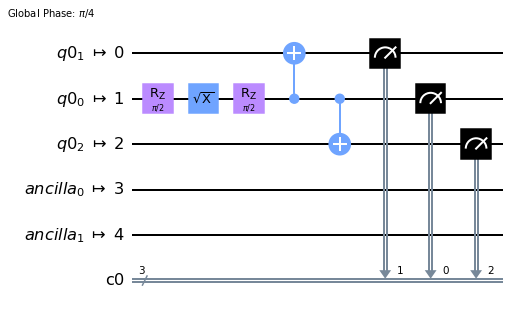

In [11]:
qc_compiled.draw('mpl')  # notice the computer uses 3 gates (Rz, sqrt(x), Rz) to create the Hadamard gate

In [12]:
import qiskit.tools.jupyter
%qiskit_job_watcher  # this should pop open a widget

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [13]:
job = qcomp.run(qc_compiled, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'000': 506, '001': 7, '010': 10, '011': 22, '100': 2, '101': 31, '110': 17, '111': 429}


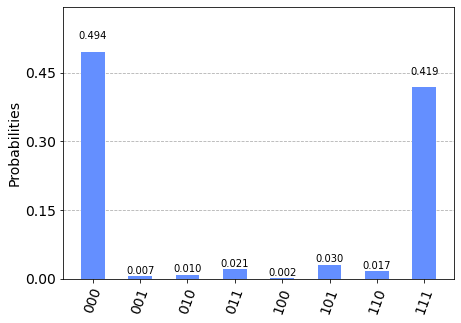

In [14]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)  # Results from the real quantum device show errors, unlike our simulated device